In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# 1. Intruduction

Presentation and documentation of the results can be found in a separate PDF. 

##### Question 1:
Which 'instrument' is the most common? 

##### Question 2:
Which companies, countries and sectors have a 'better' mental health support systems?

##### Question 3
Does a "good" mental health support system in a company have an impact on the acceptance of mental illness? (here focus on the question: mental vs. physical: Do you feel that your employer takes mental health as seriously as physical health?, because it is an overall question about acceptance.)


# 2. Imoport Data, Overview & Data Cleaning

In [374]:
path ="C:/Users/haenni/Documents/Datas/survey.csv"
ds = pd.read_csv(path)

## 2.1 Content of Data Set
This dataset contains the following data:

Timestamp

#### a) Characteristics of the interviewed person 
Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?
work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

#### b) Characteristics of the company

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

#### c) Instruments: different instrument to support employees with mental health problems in a company

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?




#### d) Acceptance / Tolerance of mental health probems (compared to physical problem) in a company
mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?


#### e) Comments on the survey
comments: Any additional notes or comments

In [375]:
ds.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

## 2.2. Data Cleaning

In [376]:
## based on Question 1 AND Question 2 select the datas needed
ds.columns


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [377]:
ds.columns
ds= ds[['Country', 'self_employed','no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_vs_physical']]

ds.columns = map(str.lower, ds.columns)

In [378]:
ds.dtypes

country               object
self_employed         object
no_employees          object
remote_work           object
tech_company          object
benefits              object
care_options          object
wellness_program      object
seek_help             object
anonymity             object
leave                 object
mental_vs_physical    object
dtype: object

In [379]:
ds.shape

(1259, 12)

In [380]:
## check and change types
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
country               1259 non-null object
self_employed         1241 non-null object
no_employees          1259 non-null object
remote_work           1259 non-null object
tech_company          1259 non-null object
benefits              1259 non-null object
care_options          1259 non-null object
wellness_program      1259 non-null object
seek_help             1259 non-null object
anonymity             1259 non-null object
leave                 1259 non-null object
mental_vs_physical    1259 non-null object
dtypes: object(12)
memory usage: 118.2+ KB


In [381]:
for x in ds.columns:
    print(x, ds[x].unique())
    
##comment: no numbers in this data set, only strings.

country ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']
self_employed [nan 'Yes' 'No']
no_employees ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work ['No' 'Yes']
tech_company ['Yes' 'No']
benefits ['Yes' "Don't know" 'No']
care_options ['Not sure' 'No' 'Yes']
wellness_program ['No' "Don't know" 'Yes']
seek_help ['Yes' "Don't know" 'No']
anonymity ['Yes' "Don't know" 'No']
leave ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_vs_physical

In [382]:
ds.describe()

## conclusion: dont'know is a common answer... 

country self_employed no_employees remote_work tech_company  \
count            1259          1241         1259        1259         1259   
unique             48             2            6           2            2   
top     United States            No         6-25          No          Yes   
freq              751          1095          290         883         1031   

       benefits care_options wellness_program seek_help   anonymity  \
count      1259         1259             1259      1259        1259   
unique        3            3                3         3           3   
top         Yes           No               No        No  Don't know   
freq        477          501              842       646         819   

             leave mental_vs_physical  
count         1259               1259  
unique           5                  3  
top     Don't know         Don't know  
freq           563                576

In [383]:
# drop columns or rows?
#ds = ds.drop_duplicates()
ds.isna().sum()
## only nan in self_employed

country                0
self_employed         18
no_employees           0
remote_work            0
tech_company           0
benefits               0
care_options           0
wellness_program       0
seek_help              0
anonymity              0
leave                  0
mental_vs_physical     0
dtype: int64

##### a. self_employed

In [384]:
## drop row with nan in self-employed? 

ds[ds['self_employed'].isna()]

## replace nan for companies with more than 5 employyes to No:

ds.loc[(ds['self_employed'].isna()) & (ds['no_employees']!='1-5'), 'self_employed'] = 'No'

## drop the other two rows with "nan" and 1-5 employess
ds=ds.dropna()

ds.shape[0]

1257

##### b) Country

In [385]:
ds.groupby('country').count()

## alot of countries with only one observation --> go for continents?

self_employed  no_employees  remote_work  \
country                                                            
Australia                          21            21           21   
Austria                             3             3            3   
Bahamas, The                        1             1            1   
Belgium                             6             6            6   
Bosnia and Herzegovina              1             1            1   
Brazil                              6             6            6   
Bulgaria                            4             4            4   
Canada                             71            71           71   
China                               1             1            1   
Colombia                            2             2            2   
Costa Rica                          1             1            1   
Croatia                             2             2            2   
Czech Republic                      1             1            1   
Denmark                             2             2            2   
Finland                             3             3            3   
France                             13            13           13   
Georgia                             1             1            1   
Germany                            45            45           45   
Greece                              2             2            2   
Hungary                             1             1            1   
India                              10            10           10   
Ireland                            27            27           27   
Israel                              5             5            5   
Italy                               7             7            7   
Japan                               1             1            1   
Latvia                              1             1            1   
Mexico                              3             3            3   
Moldova                             1             1            1   
Netherlands                        27            27           27   
New Zealand                         8             8            8   
Nigeria                             1             1            1   
Norway                              1             1            1   
Philippines                         1             1            1   
Poland                              7             7            7   
Portugal                            2             2            2   
Romania                             1             1            1   
Russia                              3             3            3   
Singapore                           4             4            4   
Slovenia                            1             1            1   
South Africa                        6             6            6   
Spain                               1             1            1   
Sweden                              7             7            7   
Switzerland                         7             7            7   
Thailand                            1             1            1   
United Kingdom                    185           185          185   
United States                     750           750          750   
Uruguay                             1             1            1   
Zimbabwe                            1             1            1   

                        tech_company  benefits  care_options  \
country                                                        
Australia                         21        21            21   
Austria                            3         3             3   
Bahamas, The                       1         1             1   
Belgium                            6         6             6   
Bosnia and Herzegovina             1         1             1   
Brazil                             6         6             6   
Bulgaria                           4         4             4   
Canada                            71        71 

In [386]:
country = sorted(list(set(list(ds['country']))))
country
#len(country)

['Australia',
 'Austria',
 'Bahamas, The',
 'Belgium',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Latvia',
 'Mexico',
 'Moldova',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Singapore',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Zimbabwe']

In [387]:
dict_continent= {'Australia': 'Australia',
 'Austria': 'Europe',
 'Bahamas, The': 'North America',
 'Belgium': 'Europe',
 'Brazil':'South America',
 'Bulgaria': 'Europe',
 'Canada': 'North America',
 'China': 'Asia',
 'Colombia': 'South America',
 'Costa Rica': 'South America',
 'Croatia': 'Europe',
 'Czech Republic': 'Europe',
 'Denmark': 'Europe',
 'Finland': 'Europe',
 'France': 'Europe',
 'Georgia': 'Europe',
 'Germany': 'Europe',
 'Greece': 'Europe',
 'Hungary': 'Europe',
 'India': 'Asia',
 'Ireland': 'Europe',
 'Israel': 'Europe',
 'Italy': 'Europe',
 'Japan': 'Asia',
 'Latvia': 'Europe',
 'Mexico': 'South America',
 'Moldova': 'Europe',
 'Netherlands': 'Europe',
 'New Zealand': 'Australia',
 'Nigeria': 'Africa',
 'Norway': 'Europe',
 'Philippines': 'Asia',
 'Poland': 'Europe',
 'Portugal': 'Europe',
 'Romania': 'Europe',
 'Russia':'Asia',
 'Singapore': 'Asia',
 'Slovenia': 'Europe',
 'South Africa': 'Africa',
 'Spain': 'Europe',
 'Sweden': 'Europe',
 'Switzerland': 'Europe',
 'Thailand': 'Asia',
 'United Kingdom': 'Europe',
 'United States': 'North America',
 'Uruguay': 'South America',
 'Zimbabwe':'Africa'}



In [388]:
ds['continent'] = ds['country'].map(dict_continent)

ds.groupby('continent').count()

## still uneven distributed among continents, this we have to keep in mind

country  self_employed  no_employees  remote_work  \
continent                                                          
Africa               8              8             8            8   
Asia                21             21            21           21   
Australia           29             29            29           29   
Europe             363            363           363          363   
North America      822            822           822          822   
South America       13             13            13           13   

               tech_company  benefits  care_options  wellness_program  \
continent                                                               
Africa                    8         8             8                 8   
Asia                     21        21            21                21   
Australia                29        29            29                29   
Europe                  363       363           363               363   
North America           822       822           822               822   
South America            13        13            13                13   

               seek_help  anonymity  leave  mental_vs_physical  
continent                                                       
Africa                 8          8      8                   8  
Asia                  21         21     21                  21  
Australia             29         29     29                  29  
Europe               363        363    363                 363  
North America        822        822    822                 822  
South America         13         13     13                  13

#### c) No_employees

In [ ]:
## which values are there in no_emplyees?
numbEmpl = sorted(list(set(list(ds['no_employees']))))


In [478]:
### no_employees is difficult to sort, because its text --> create a dictionary (stand value), that helps to sort later

dict_empL = {'1-5': 0, '6-25': 0.2,'26-100': 0.4, '100-500': 0.6, '500-1000': 0.8, 'More than 1000': 1}
ds['no_employees_stand'] = ds['no_employees'].map(dict_empL)

ds.groupby('no_employees_stand').count()

country  self_employed  no_employees  remote_work  \
no_employees_stand                                                      
0.0                     157            157           157          157   
0.2                     289            289           289          289   
0.4                     282            282           282          282   
0.6                     172            172           172          172   
0.8                      60             60            60           60   
1.0                     271            271           271          271   

                    tech_company  benefits  care_options  wellness_program  \
no_employees_stand                                                           
0.0                          157       157           157               157   
0.2                          289       289           289               289   
0.4                          282       282           282               282   
0.6                          172       172           172               172   
0.8                           60        60            60                60   
1.0                          271       271           271               271   

                    seek_help  anonymity  leave  mental_vs_physical  \
no_employees_stand                                                    
0.0                       157        157    157                 157   
0.2                       289        289    289                 289   
0.4                       282        282    282                 282   
0.6                       172        172    172                 172   
0.8                        60         60     60                  60   
1.0                       271        271    271                 271   

                    continent  benefits_stand  wellness_program_stand  \
no_employees_stand                                                      
0.0                       157             157                     157   
0.2                       289             289                     289   
0.4                       282             282                     282   
0.6                       172             172                     172   
0.8                        60              60                      60   
1.0                       271             271                     271   

                    seek_help_stand  anonymity_stand  \
no_employees_stand                                     
0.0                             157              157   
0.2                             289              289   
0.4                             282              282   
0.6                             172              172   
0.8                              60               60   
1.0                             271              271   

                    mental_vs_physical_stand  care_options_stand  leave_stand  
no_employees_stand                                                             
0.0                                      157                 157          157  
0.2                                      289                 289          289  
0.4                                      282                 282          282  
0.6                                      172                 172          172  
0.8                                       60                  60           60  
1.0                                      271                 271          271

##### d) Remote_work & tech_company

In [390]:
for col in ['remote_work','tech_company']:
    print(ds.groupby(col).agg({'country': 'count'}).rename(columns={'country': '#'}))

## maybe not a representative sample size, but despite of that oks

               #
remote_work     
No           883
Yes          374
                 #
tech_company      
No             228
Yes           1029


##### e) Check and add an Index for the "Instruments" and the " Acceptance"

In [391]:
### all columns, except of care_options and leave (they have other anser categories)

col_Inst=['benefits', 'wellness_program', 'seek_help', 'anonymity', 'mental_vs_physical']

for col in col_Inst:
    print(ds.groupby(col).agg({'country': 'count'}).rename(columns={'country': '#'}))

              #
benefits       
Don't know  408
No          372
Yes         477
                    #
wellness_program     
Don't know        188
No                840
Yes               229
              #
seek_help      
Don't know  363
No          644
Yes         250
              #
anonymity      
Don't know  819
No           64
Yes         374
                      #
mental_vs_physical     
Don't know          575
No                  339
Yes                 343


In [392]:
ds_dontKnow=ds.loc[(ds['benefits'] == "Don't know") | (ds['wellness_program'] == "Don't know") | (ds['seek_help'] == "Don't know") | (ds['anonymity'] == "Don't know") | (ds['mental_vs_physical'] == "Don't know")]
print(ds_dontKnow.shape[0])
### tooo many to delete

ds_dontKnow = ds.loc[(ds['benefits'] == "Don't know") & (ds['wellness_program'] == "Don't know") & (ds['seek_help'] == "Don't know") & (ds['anonymity'] == "Don't know") & (ds['mental_vs_physical'] == "Don't know")]
print(ds_dontKnow.shape[0])

## we could delete the 48 with all "dont knows", not yet

1017
48


In [393]:
## we have a lot of 'Dont know'. What can we do with them, when we want to compare the supporting - system?
## approach for indexing: value btw. "yes" and "no",

In [394]:
# indexing btw. 0 and 1 for later analysis

dict_inst={'Yes':1, "Don't know": 0.5, 'No': 0}

for col in col_Inst:
    colname= col+'_stand'
    ds[colname] = ds[col].map(dict_inst)
    
ds.head()

country self_employed    no_employees remote_work tech_company  \
0   United States            No            6-25          No          Yes   
1   United States            No  More than 1000          No           No   
2          Canada            No            6-25          No          Yes   
3  United Kingdom            No          26-100          No          Yes   
4   United States            No         100-500         Yes          Yes   

     benefits care_options wellness_program   seek_help   anonymity  \
0         Yes     Not sure               No         Yes         Yes   
1  Don't know           No       Don't know  Don't know  Don't know   
2          No           No               No          No  Don't know   
3          No          Yes               No          No          No   
4         Yes           No       Don't know  Don't know  Don't know   

                leave mental_vs_physical      continent  no_employees_stand  \
0       Somewhat easy                Yes  North America                 0.2   
1          Don't know         Don't know  North America                 1.0   
2  Somewhat difficult                 No  North America                 0.2   
3  Somewhat difficult                 No         Europe                 0.4   
4          Don't know         Don't know  North America                 0.6   

   benefits_stand  wellness_program_stand  seek_help_stand  anonymity_stand  \
0             1.0                     0.0              1.0              1.0   
1             0.5                     0.5              0.5              0.5   
2             0.0                     0.0              0.0              0.5   
3             0.0                     0.0              0.0              0.0   
4             1.0                     0.5              0.5              0.5   

   mental_vs_physical_stand  
0                       1.0  
1                       0.5  
2                       0.0  
3                       0.0  
4                       0.5

In [395]:
# same for care_options

print(ds.groupby('care_options').agg({'country': 'count'}).rename(columns={'country': '#'}))


ds_dontKnow = ds.loc[(ds['care_options'] == "Not sure") & (ds['benefits'] == "Don't know") & (ds['wellness_program'] == "Don't know") & (ds['seek_help'] == "Don't know") & (ds['anonymity'] == "Don't know") & (ds['mental_vs_physical'] == "Don't know")]
ds_dontKnow.shape[0]
## still 32 with only useless answers (=potential to be dropped)

                #
care_options     
No            500
Not sure      314
Yes           443


32

In [396]:
dict_inst={'Yes':1, 'Not sure': 0.5, 'No': 0}

ds['care_options_stand'] = ds['care_options'].map(dict_inst)
print(ds.groupby('care_options_stand').agg({'country': 'count'}).rename(columns={'country': '#'}))

                      #
care_options_stand     
0.0                 500
0.5                 314
1.0                 443


In [397]:
## same  for leave

print(ds.groupby('leave').agg({'country': 'count'}).rename(columns={'country': '#'}))


ds_dontKnow = ds.loc[(ds['leave'] == "Don't know") & (ds['care_options'] == "Not sure") & (ds['benefits'] == "Don't know") & (ds['wellness_program'] == "Don't know") & (ds['seek_help'] == "Don't know") & (ds['anonymity'] == "Don't know") & (ds['mental_vs_physical'] == "Don't know")]
ds_dontKnow.shape[0]


#ds = ds[(ds['leave'] != "Don't know") & (ds['care_options'] != "Not sure") & (ds['benefits'] != "Don't know") & (ds['wellness_program'] != "Don't know") & (ds['seek_help'] != "Don't know") & (ds['anonymity'] != "Don't know") & (ds['mental_vs_physical'] != "Don't know")]
#ds.shape[0]
### drop this 26 with only useless answers ('dont know and not sure')

index_drop =ds[(ds['leave'] == "Don't know") & (ds['care_options'] == "Not sure") & (ds['benefits'] == "Don't know") & (ds['wellness_program'] == "Don't know") & (ds['seek_help'] == "Don't know") & (ds['anonymity'] == "Don't know") & (ds['mental_vs_physical'] == "Don't know")].index
len(index_drop) ## ok 26
ds.drop(index_drop, axis= 0, inplace=True)

print(ds.groupby('leave').agg({'country': 'count'}).rename(columns={'country': '#'}))


                      #
leave                  
Don't know          562
Somewhat difficult  125
Somewhat easy       266
Very difficult       98
Very easy           206
                      #
leave                  
Don't know          536
Somewhat difficult  125
Somewhat easy       266
Very difficult       98
Very easy           206


In [398]:
dict_inst={'Very difficult' :0 ,'Somewhat difficult' :0.33 , "Don't know": 0.5, 'Somewhat easy': 0.666, 'Very easy': 1}

ds['leave_stand'] = ds['leave'].map(dict_inst)


In [399]:
ds.head()

country self_employed    no_employees remote_work tech_company  \
0   United States            No            6-25          No          Yes   
1   United States            No  More than 1000          No           No   
2          Canada            No            6-25          No          Yes   
3  United Kingdom            No          26-100          No          Yes   
4   United States            No         100-500         Yes          Yes   

     benefits care_options wellness_program   seek_help   anonymity  ...  \
0         Yes     Not sure               No         Yes         Yes  ...   
1  Don't know           No       Don't know  Don't know  Don't know  ...   
2          No           No               No          No  Don't know  ...   
3          No          Yes               No          No          No  ...   
4         Yes           No       Don't know  Don't know  Don't know  ...   

  mental_vs_physical      continent no_employees_stand  benefits_stand  \
0                Yes  North America                0.2             1.0   
1         Don't know  North America                1.0             0.5   
2                 No  North America                0.2             0.0   
3                 No         Europe                0.4             0.0   
4         Don't know  North America                0.6             1.0   

   wellness_program_stand  seek_help_stand  anonymity_stand  \
0                     0.0              1.0              1.0   
1                     0.5              0.5              0.5   
2                     0.0              0.0              0.5   
3                     0.0              0.0              0.0   
4                     0.5              0.5              0.5   

   mental_vs_physical_stand  care_options_stand  leave_stand  
0                       1.0                 0.5        0.666  
1                       0.5                 0.0        0.500  
2                       0.0                 0.0        0.330  
3                       0.0                 1.0        0.330  
4                       0.5                 0.0        0.500  

[5 rows x 21 columns]

In [400]:
# relevant columns standardised for further analysis
ds2= ds[['country','continent', 'self_employed','no_employees','no_employees_stand',
       'remote_work', 'tech_company', 'benefits_stand', 'care_options_stand',
       'wellness_program_stand', 'seek_help_stand', 'anonymity_stand', 'leave_stand',
       'mental_vs_physical_stand']]

In [401]:
ds2

country      continent self_employed    no_employees  \
0      United States  North America            No            6-25   
1      United States  North America            No  More than 1000   
2             Canada  North America            No            6-25   
3     United Kingdom         Europe            No          26-100   
4      United States  North America            No         100-500   
...              ...            ...           ...             ...   
1254  United Kingdom         Europe            No          26-100   
1255   United States  North America            No          26-100   
1256   United States  North America            No  More than 1000   
1257   United States  North America            No         100-500   
1258   United States  North America            No          26-100   

      no_employees_stand remote_work tech_company  benefits_stand  \
0                    0.2          No          Yes             1.0   
1                    1.0          No           No             0.5   
2                    0.2          No          Yes             0.0   
3                    0.4          No          Yes             0.0   
4                    0.6         Yes          Yes             1.0   
...                  ...         ...          ...             ...   
1254                 0.4          No          Yes             0.0   
1255                 0.4         Yes          Yes             1.0   
1256                 1.0          No          Yes             1.0   
1257                 0.6         Yes          Yes             0.0   
1258                 0.4          No           No             1.0   

      care_options_stand  wellness_program_stand  seek_help_stand  \
0                    0.5                     0.0              1.0   
1                    0.0                     0.5              0.5   
2                    0.0                     0.0              0.0   
3                    1.0                     0.0              0.0   
4                    0.0                     0.5              0.5   
...                  ...                     ...              ...   
1254                 0.0                     0.0              0.0   
1255                 1.0                     0.0              0.0   
1256                 1.0                     0.0              0.0   
1257                 1.0                     0.0              0.0   
1258                 1.0                     0.0              0.0   

      anonymity_stand  leave_stand  mental_vs_physical_stand  
0                 1.0        0.666                       1.0  
1                 0.5        0.500                       0.5  
2                 0.5        0.330                       0.0  
3                 0.0        0.330                       0.0  
4                 0.5        0.500                       0.5  
...               ...          ...                       ...  
1254              0.5        0.666                       0.5  
1255              1.0        0.330                       1.0  
1256              0.5        0.330                       0.0  
1257              0.5        0.500                       0.0  
1258              1.0        0.500                       0.5  

[1231 rows x 14 columns]

# 3. Describtive Data Analysis

In [402]:
ds2.describe()

no_employees_stand  benefits_stand  care_options_stand  \
count          1231.00000     1231.000000         1231.000000   
mean              0.48156        0.542648            0.476848   
std               0.34041        0.413208            0.437184   
min               0.00000        0.000000            0.000000   
25%               0.20000        0.000000            0.000000   
50%               0.40000        0.500000            0.500000   
75%               0.80000        1.000000            1.000000   
max               1.00000        1.000000            1.000000   

       wellness_program_stand  seek_help_stand  anonymity_stand  leave_stand  \
count             1231.000000      1231.000000      1231.000000  1231.000000   
mean                 0.251828         0.339968         0.625914     0.562474   
std                  0.394508         0.395065         0.270476     0.258416   
min                  0.000000         0.000000         0.000000     0.000000   
25%                  0.000000         0.000000         0.500000     0.500000   
50%                  0.000000         0.000000         0.500000     0.500000   
75%                  0.500000         0.500000         1.000000     0.666000   
max                  1.000000         1.000000         1.000000     1.000000   

       mental_vs_physical_stand  
count               1231.000000  
mean                   0.501625  
std                    0.372311  
min                    0.000000  
25%                    0.000000  
50%                    0.500000  
75%                    1.000000  
max                    1.000000

In [403]:
#sns.pairplot(ds2)




## since we only have categorical variables, not really helpfull..
## but the diagonal axis provides bar plots for all variable

In [404]:
#pip install pandas-profiling[notebook,html]


In [405]:
#from pandas_profiling import ProfileReport

In [406]:
#profile = ProfileReport(ds, title='Pandas Profiling Report')

In [407]:
#profile.to_notebook_iframe()

# 3. Explorative Data Analysis

### 3.1 Which 'instrument' is the most common? 

In [408]:
ds3.columns
list_means= ds3.mean()*100
dict_means = dict(zip(ds3.columns, list_means))
dict_means
means= pd.DataFrame.from_dict(dict_means, orient='index', columns = ['means'])
means

means
benefits_stand          54.264825
care_options_stand      47.684809
wellness_program_stand  25.182778
seek_help_stand         33.996751
anonymity_stand         62.591389
leave_stand             56.247441

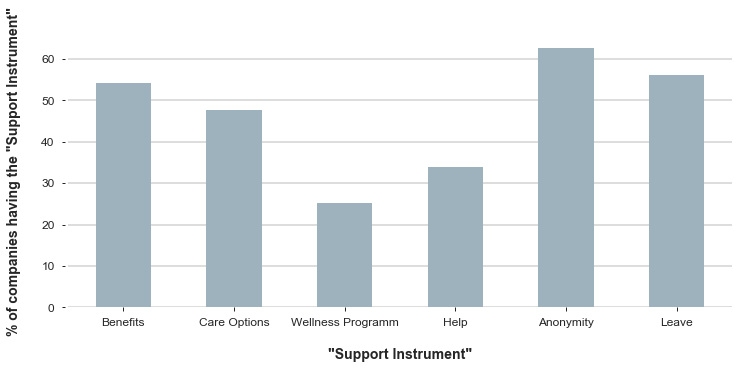

In [409]:
## plot a barplot in my companies corporate identity

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_facecolor("white") ## white background
plt.hlines(y=(0, 10, 20,30,40,50,60), xmin=-0.5, xmax=5.5, color=[(0.85,0.85,0.85)], zorder=1) ## grey horizontal lines in the background
ax.bar(means.index, means.means, width= 0.5, color=[(0.62,0.698,0.745)]) ## bars in RGB divided by 255)

plt.yticks(fontsize='12', fontname="Arial")
plt.xticks(np.arange(6), ('Benefits', 'Care Options', 'Wellness Programm', 'Help', 'Anonymity', 'Leave'), fontsize = '12', fontname="Arial")

plt.xlabel('"Support Instrument"', fontsize ='14', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('% of companies having the "Support Instrument"', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)

#plt.show() 

plt.savefig('fig1.png', bbox_inches='tight') ## bbbox to not cut the labels

### 3.2 Wich companies, countries and sectors have good mental health support system? 

Remarks: 

- Focus on contries, continent, size of company and sector

- no focus on self employment and remote work: very likely to see differences there, maybe for a later analysis, this would be interessting and the result should also be taken into account when analysing the attributes countries, continent .. (drop self employed?)

In [410]:
## create one index for "having support instruments" by taking the mean of all standardised values from the "instruments" 
ds2['support_index'] = (ds2['benefits_stand'] + ds2['care_options_stand'] +ds2['wellness_program_stand'] + ds2['seek_help_stand'] + ds2['anonymity_stand'] + ds2['leave_stand'])/6

ds4 = ds2[['country', 'continent', 'no_employees', 'no_employees_stand', 'tech_company', 'support_index']]

ds4.head(50)

country      continent    no_employees  no_employees_stand  \
0    United States  North America            6-25                 0.2   
1    United States  North America  More than 1000                 1.0   
2           Canada  North America            6-25                 0.2   
3   United Kingdom         Europe          26-100                 0.4   
4    United States  North America         100-500                 0.6   
5    United States  North America            6-25                 0.2   
8    United States  North America         100-500                 0.6   
9           Canada  North America          26-100                 0.4   
10   United States  North America            6-25                 0.2   
11        Bulgaria         Europe         100-500                 0.6   
12   United States  North America          26-100                 0.4   
13   United States  North America        500-1000                 0.8   
14          Canada  North America            6-25                 0.2   
15   United States  North America          26-100                 0.4   
16  United Kingdom         Europe          26-100                 0.4   
17   United States  North America            6-25                 0.2   
18   United States  North America             1-5                 0.0   
19          France         Europe            6-25                 0.2   
20   United States  North America         100-500                 0.6   
21   United States  North America             1-5                 0.0   
22   United States  North America          26-100                 0.4   
23   United States  North America  More than 1000                 1.0   
24   United States  North America          26-100                 0.4   
25   United States  North America  More than 1000                 1.0   
26   United States  North America             1-5                 0.0   
27   United States  North America            6-25                 0.2   
28   United States  North America          26-100                 0.4   
29  United Kingdom         Europe            6-25                 0.2   
30  United Kingdom         Europe            6-25                 0.2   
31   United States  North America             1-5                 0.0   
32  United Kingdom         Europe        500-1000                 0.8   
33   United States  North America          26-100                 0.4   
34   United States  North America             1-5                 0.0   
35   United States  North America            6-25                 0.2   
36          Canada  North America             1-5                 0.0   
37        Portugal         Europe         100-500                 0.6   
38   United States  North America         100-500                 0.6   
39   United States  North America  More than 1000                 1.0   
40  United Kingdom         Europe            6-25                 0.2   
41   United States  North America  More than 1000                 1.0   
42          Canada  North America             1-5                 0.0   
43     Netherlands         Europe            6-25                 0.2   
44   United States  North America          26-100                 0.4   
45   United States  North America          26-100                 0.4   
46  United Kingdom         Europe          26-100                 0.4   
47   United States  North America            6-25                 0.2   
48          Canada  North America             1-5                 0.0   
49   United States  North America          26-100                 0.4   
50   United States  North America            6-25                 0.2   
52   United States  North America         100-500                 0.6   

   tech_company  support_index  
0           Yes       0.694333  
1            No       0.416667  
2           Yes       0.138333  
3           Yes       0.221667  
4           Yes       0.500000  
5           Yes       0.500000  
8           Yes       0.333333  
9           Yes       0

#### 3.2.1 by Countries / Continents

###### a) Countries


In [411]:
countries_unique = ds4.groupby('country').agg({'support_index': 'mean', 'continent': 'count'}).rename(columns={'support_index': 'Ø support_index', 'continent': 'counts'})

In [412]:
countries_unique.head()

Ø support_index  counts
country                              
Australia            0.497254      21
Austria              0.546222       3
Bahamas, The         1.000000       1
Belgium              0.287000       6
Brazil               0.236056       6

In [413]:
countries_unique=countries_unique.sort_values('Ø support_index', ascending = False)

In [414]:
countries_labels = [str(countries_unique.index[x])+ " (# "+str(countries_unique['counts'][x])+")" for x in range(int(countries_unique.shape[0]))]

countries_labels 

['Bahamas, The (# 1)',
 'Norway (# 1)',
 'Austria (# 3)',
 'United States (# 731)',
 'Denmark (# 2)',
 'Australia (# 21)',
 'Japan (# 1)',
 'Sweden (# 6)',
 'Canada (# 70)',
 'Croatia (# 2)',
 'Costa Rica (# 1)',
 'Israel (# 5)',
 'Switzerland (# 7)',
 'Netherlands (# 27)',
 'New Zealand (# 8)',
 'Germany (# 45)',
 'United Kingdom (# 182)',
 'Latvia (# 1)',
 'China (# 1)',
 'Czech Republic (# 1)',
 'Russia (# 3)',
 'France (# 13)',
 'Uruguay (# 1)',
 'Thailand (# 1)',
 'Moldova (# 1)',
 'Romania (# 1)',
 'Italy (# 7)',
 'Singapore (# 4)',
 'Portugal (# 2)',
 'Poland (# 7)',
 'Ireland (# 26)',
 'Belgium (# 6)',
 'India (# 10)',
 'Slovenia (# 1)',
 'South Africa (# 6)',
 'Brazil (# 6)',
 'Mexico (# 3)',
 'Bulgaria (# 4)',
 'Finland (# 3)',
 'Colombia (# 2)',
 'Philippines (# 1)',
 'Nigeria (# 1)',
 'Spain (# 1)',
 'Greece (# 2)',
 'Zimbabwe (# 1)',
 'Georgia (# 1)',
 'Hungary (# 1)']

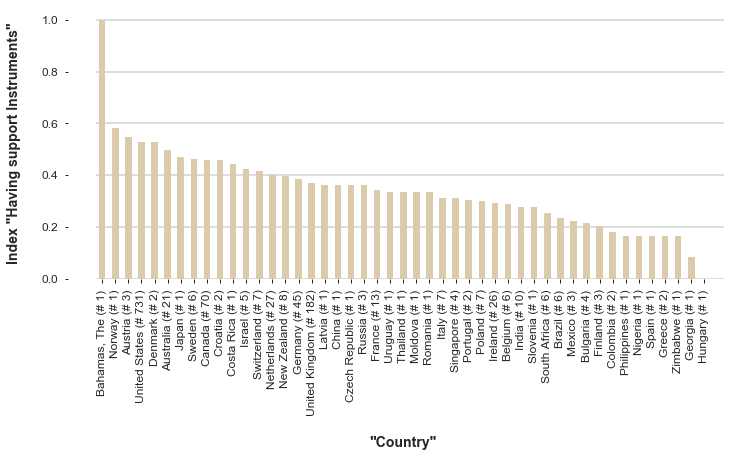

In [415]:
## plot a barplot in my companies corporate identity

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_facecolor("white") ## white background
plt.hlines(y=(0, 0.2, 0.4, 0.6, 0.8, 1), xmin=-0.5, xmax=float(countries_unique.shape[0])+0.5, color=[(0.85,0.85,0.85)], zorder=1) ## grey horizontal lines in the background
ax.bar(countries_unique.index, countries_unique['Ø support_index'], width= 0.5, color=[(0.86,0.796,0.670588)]) ## bars in RGB divided by 255)

plt.yticks(fontsize='12', fontname="Arial")
plt.xticks(np.arange(int(countries_unique.shape[0])), countries_labels, fontsize = '12', fontname="Arial", rotation='vertical')

plt.xlabel('"Country"', fontsize ='14', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('Index "Having support Instruments"', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)

#plt.show() 

plt.savefig('fig2.png', bbox_inches='tight') ## bbbox to not cut the labels

##### b) Continent

Remark: repete same procedure as with countries

In [416]:
continent_unique = ds4.groupby('continent').agg({'support_index': 'mean', 'country': 'count'}).rename(columns={'support_index': 'Ø support_index', 'country': 'counts'})

In [418]:
continent_unique=continent_unique.sort_values('Ø support_index', ascending = False)

In [419]:
continent_labels = [str(continent_unique.index[x])+ "\n (# "+str(continent_unique['counts'][x])+")" for x in range(int(continent_unique.shape[0]))]
continent_labels 

['North America\n (# 802)',
 'Australia\n (# 29)',
 'Europe\n (# 358)',
 'Asia\n (# 21)',
 'South America\n (# 13)',
 'Africa\n (# 8)']

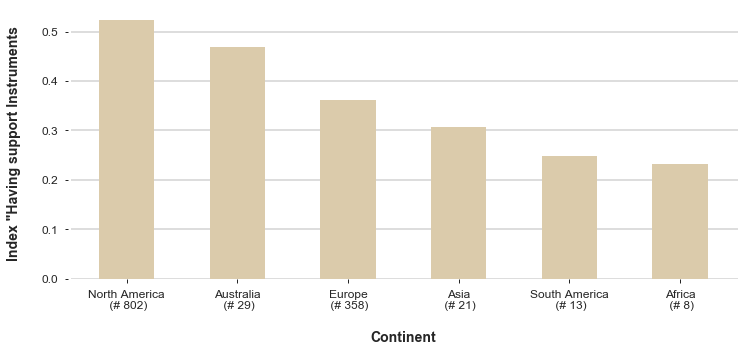

In [420]:
## plot a barplot in my companies corporate identity

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_facecolor("white") ## white background
plt.hlines(y=(0,0.1, 0.2,0.3, 0.4, 0.5), xmin=-0.5, xmax=float(continent_unique.shape[0])+0.5, color=[(0.85,0.85,0.85)], zorder=1) ## grey horizontal lines in the background
ax.bar(continent_unique.index, continent_unique['Ø support_index'], width= 0.5, color=[(0.86,0.796,0.670588)]) ## bars in RGB divided by 255)

plt.yticks(fontsize='12', fontname="Arial")
plt.xticks(np.arange(int(continent_unique.shape[0])), continent_labels, fontsize = '12', fontname="Arial")

plt.xlabel('Continent', fontsize ='14', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('Index "Having support Instruments', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)

#plt.show() 

plt.savefig('fig3.png', bbox_inches='tight') ## bbbox to not cut the labels

In [421]:
size_unique = ds4.groupby(['no_employees']).agg({'support_index': 'mean', 'country': 'count'}).rename(columns={'support_index': 'Ø support_index', 'country': 'counts'})

In [422]:
size_unique ['no_employees_stand'] = size_unique.index.map(dict_empL)

In [423]:
size_unique=size_unique.sort_values('no_employees_stand')

In [424]:
size_unique

Ø support_index  counts  no_employees_stand
no_employees                                               
1-5                    0.389673     157                 0.0
6-25                   0.364204     289                 0.2
26-100                 0.440709     282                 0.4
100-500                0.476994     172                 0.6
500-1000               0.553183      60                 0.8
More than 1000         0.621599     271                 1.0

In [425]:
size_labels = [str(size_unique.index[x])+ "\n (# "+str(size_unique['counts'][x])+")" for x in range(int(size_unique.shape[0]))]
size_labels 

['1-5\n (# 157)',
 '6-25\n (# 289)',
 '26-100\n (# 282)',
 '100-500\n (# 172)',
 '500-1000\n (# 60)',
 'More than 1000\n (# 271)']

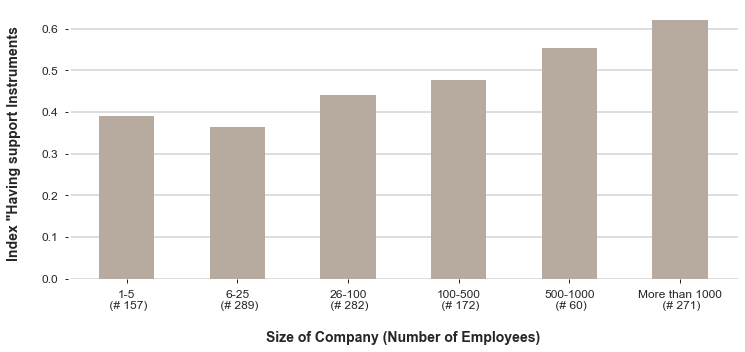

In [426]:
## plot a barplot in my companies corporate identity

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_facecolor("white") ## white background
plt.hlines(y=(0,0.1, 0.2,0.3, 0.4, 0.5, 0.6), xmin=-0.5, xmax=float(size_unique.shape[0])+0.5, color=[(0.85,0.85,0.85)], zorder=1) ## grey horizontal lines in the background
ax.bar(size_unique.index, size_unique['Ø support_index'], width= 0.5, color=[(0.7176,0.671,0.627)]) ## bars in RGB divided by 255)

plt.yticks(fontsize='12', fontname="Arial")
plt.xticks(np.arange(int(size_unique.shape[0])), size_labels, fontsize = '12', fontname="Arial")

plt.xlabel("Size of Company (Number of Employees)", fontsize ='14', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('Index "Having support Instruments', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)

#plt.show() 

plt.savefig('fig4.png', bbox_inches='tight') ## bbbox to not cut the labels

### 3.2.1 tech / non-tech companies
Remark: repete same procedure as with countries and continent

In [307]:
tech_unique = ds4.groupby(['tech_company']).agg({'support_index': 'mean', 'country': 'count'}).rename(columns={'support_index': 'Ø support_index', 'country': 'counts'})

In [308]:
tech_unique

Ø support_index  counts
tech_company                         
No                   0.514412     226
Yes                  0.455865    1005

In [311]:
tech_labels = ['Non-Tech Companies'+ "\n (# "+str(tech_unique['counts'][x])+")" if tech_unique.index[x] == 'No' else 'Tech Companies'+ "\n (# "+str(tech_unique['counts'][x])+")" for x in range(int(tech_unique.shape[0]))]
tech_labels 


['Non-Tech Companies\n (# 226)', 'Tech Companies\n (# 1005)']

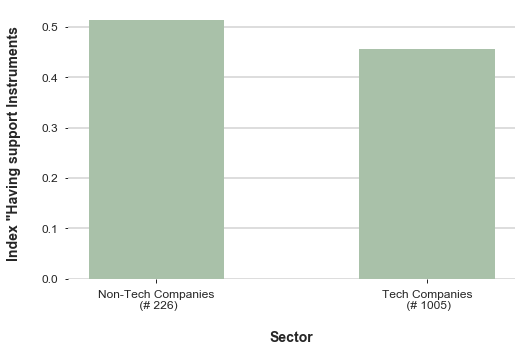

In [371]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_facecolor("white") ## white background
plt.hlines(y=(0,0.1, 0.2,0.3, 0.4, 0.5, 0.6), xmin=-0.5, xmax=float(tech_unique.shape[0])+0.5, color=[(0.85,0.85,0.85)], zorder=1) ## grey horizontal lines in the background
ax.bar(tech_unique.index, tech_unique['Ø support_index'], width= 0.5, color=[(0.663,0.757,0.663)]) ## bars in RGB divided by 255)

plt.yticks(fontsize='12', fontname="Arial")
plt.xticks(np.arange(int(tech_unique.shape[0])), tech_labels, fontsize = '12', fontname="Arial")

plt.xlabel("Sector", fontsize ='14', fontweight='bold', fontname="Arial", labelpad=20)  
plt.ylabel('Index "Having support Instruments', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)

#plt.show() 

plt.savefig('fig5.png', bbox_inches='tight') ## bbbox to not cut the labels

### 3.2. Does a "good" mental health support system in a company have an impact on the acceptance of mental illness? (Which instruments?)

In [479]:
### select relevant columns

ds5 = ds2[['mental_vs_physical_stand','benefits_stand', 'care_options_stand','wellness_program_stand', 'seek_help_stand', 'anonymity_stand', 'leave_stand', 'support_index' ]]

##### a) Correlationmatrix

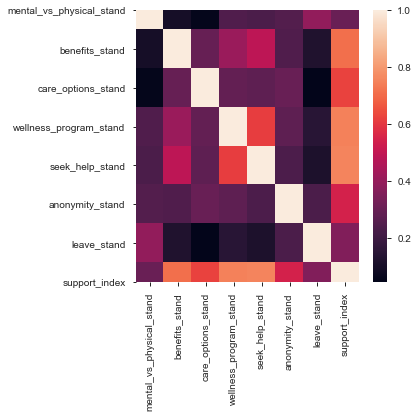

In [430]:
corrMatrix = ds5.corr()

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrMatrix)

In [431]:
corrMatrix['mental_vs_physical_stand']

mental_vs_physical_stand    1.000000
benefits_stand              0.099959
care_options_stand          0.055175
wellness_program_stand      0.246296
seek_help_stand             0.235302
anonymity_stand             0.252282
leave_stand                 0.395211
support_index               0.303700
Name: mental_vs_physical_stand, dtype: float64

In [ ]:
## correlationmatrix indicates a small correlation btw. the support_index and the Acceptance (mental_vs_physical)
## the highest correlation is bt. Leave and Acceptance

##### b) linear regression with "support instruments index"

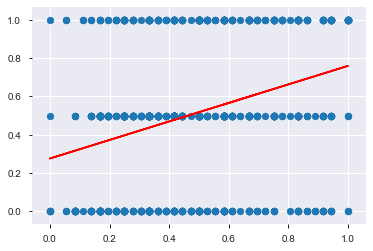

In [434]:
X = ds5['support_index']
Y = ds5['mental_vs_physical_stand']


slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * ds5['support_index']

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [437]:
r_value


0.30369955042997915

In [438]:
p_value

1.1126706684239157e-27

In [435]:
Y_pred = intercept + slope *X
res= Y-Y_pred


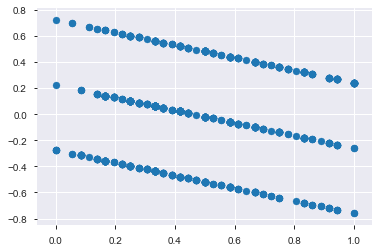

In [436]:
plt.scatter(X, res)

In [439]:
###---> result is not good, because p_value is too high and the residuals have a pattern

###### c) multivariate regression with diffrent "support instruments"

In [446]:
ds5['mental_vs_physical_stand']

0       1.0
1       0.5
2       0.0
3       0.0
4       0.5
       ... 
1254    0.5
1255    1.0
1256    0.0
1257    0.0
1258    0.5
Name: mental_vs_physical_stand, Length: 1231, dtype: float64

In [447]:
X = ds5[['benefits_stand', 'care_options_stand','wellness_program_stand', 'seek_help_stand', 'anonymity_stand', 'leave_stand']]

Y = ds5['mental_vs_physical_stand']

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)


Intercept:  0.09115739045873872
Coef:  [-0.07257064 -0.04524662  0.10976214  0.134982    0.19557227  0.48976691]


In [464]:
coef = [round(float(x), 2) for x in lm.coef_]
list_x= ds5[['benefits_stand', 'care_options_stand','wellness_program_stand', 'seek_help_stand', 'anonymity_stand', 'leave_stand']].columns

coef_df=pd.DataFrame.from_dict(dict(zip(list_x, coef,)), orient='index')

coef_df


0
benefits_stand         -0.07
care_options_stand     -0.05
wellness_program_stand  0.11
seek_help_stand         0.13
anonymity_stand         0.20
leave_stand             0.49

In [462]:
dict_inst= {'benefits_stand': 'Benefits', 'care_options_stand': 'Care Options','wellness_program_stand': 'Wellness Programm', 'seek_help_stand': 'Help', 'anonymity_stand': 'Anonymity', 'leave_stand': 'Leave'}

In [ ]:
coef_df['Instrument'] = coef_df.index.map(dict_inst)

In [477]:
coef_to_print = coef_df[['Instrument', 0]].rename(columns={0: 'Coefficients of MVR with Acceptance'}).reset_index(drop=True)
coef_to_print.to_csv('MVR_coeff.csv')

###### Conclusion:

Causation or correlation? 

Probably more the inverse causality: Acceptance leads to more "support instruments scheemes" in a company?s

For further investigation: do the opposite analysis, therefore create index for the acceptance.